# KNN によるデータの分類評価
KNN モデルを構築し，交差確認法を用いてモデルの評価を行う

In [1]:
import sklearn as sk
import sklearn.model_selection as skms
import sklearn.neighbors as skn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DIRECTORIES = ["../windowed", "../windowed_boxcox", "../reducted", "../reducted_boxcox"]
TIMEWINDOWS = [120, 180, 240]
N_NEIGHBORS_LIST = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

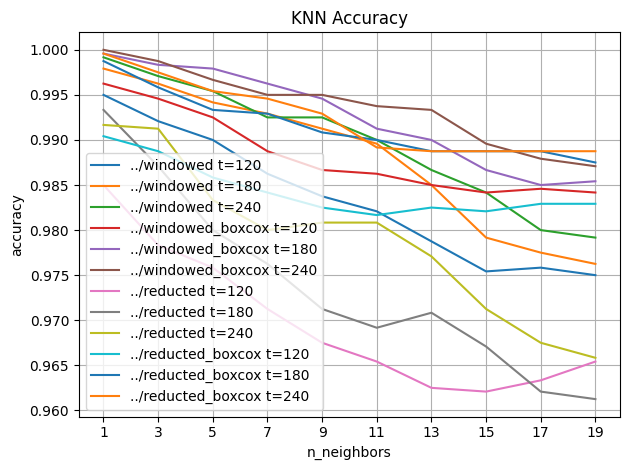

,directory,time_window,n_neighbors,avg(score),std(score),avg(score)-std(score)
50,../windowed_boxcox,240,1,1.0,0.0,1.0
40,../windowed_boxcox,180,1,0.999583,0.000833,0.99875
110,../reducted_boxcox,240,1,0.999583,0.000833,0.99875
20,../windowed,240,1,0.999167,0.001021,0.998146
100,../reducted_boxcox,180,1,0.99875,0.001667,0.997083
51,../windowed_boxcox,240,3,0.99875,0.001021,0.997729
41,../windowed_boxcox,180,3,0.998333,0.000833,0.9975
10,../windowed,180,1,0.997917,0.001318,0.996599
42,../windowed_boxcox,180,5,0.997917,0.002282,0.995634
111,../reducted_boxcox,240,3,0.9975,0.002041,0.995459


,directory,time_window,n_neighbors,avg(score),std(score),avg(score)-std(score)
50,../windowed_boxcox,240,1,1.0,0.0,1.0
110,../reducted_boxcox,240,1,0.999583,0.000833,0.99875
40,../windowed_boxcox,180,1,0.999583,0.000833,0.99875
20,../windowed,240,1,0.999167,0.001021,0.998146
51,../windowed_boxcox,240,3,0.99875,0.001021,0.997729
41,../windowed_boxcox,180,3,0.998333,0.000833,0.9975
100,../reducted_boxcox,180,1,0.99875,0.001667,0.997083
10,../windowed,180,1,0.997917,0.001318,0.996599
42,../windowed_boxcox,180,5,0.997917,0.002282,0.995634
111,../reducted_boxcox,240,3,0.9975,0.002041,0.995459


In [3]:
N_SPlITS = 5
N_SAMPLES = 80

# スコア表の初期化
df_score = pd.DataFrame(columns=["directory", "time_window", "n_neighbors", "avg(score)", "std(score)", "avg(score)-std(score)"])

for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIMEWINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)
        X = df.drop(columns=["label", "ble_id"])
        y = df["label"]

        accs = []
        for n_neighbors in N_NEIGHBORS_LIST:
            knn = skn.KNeighborsClassifier(n_neighbors=n_neighbors)
            kf = skms.StratifiedKFold(N_SPlITS, shuffle=True, random_state=0)
            scores = skms.cross_val_score(knn, X, y, cv=kf)
            accs.append(scores.mean())

            df_score.loc[len(df_score)] = pd.Series(
                {
                    "directory": directory,
                    "time_window": time_window,
                    "n_neighbors": n_neighbors,
                    "avg(score)": scores.mean(),
                    "std(score)": scores.std(),
                    "avg(score)-std(score)": scores.mean() - scores.std(),
                },
            )

        plt.plot(N_NEIGHBORS_LIST, accs)

plt.title("KNN Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(N_NEIGHBORS_LIST)
plt.grid(True)
plt.legend(
    [f"{dir} t={time_window}" for dir in DIRECTORIES for time_window in TIMEWINDOWS]
)

plt.tight_layout()
plt.show()
display(df_score.sort_values("avg(score)", ascending=False).head(20))
display(df_score.sort_values("avg(score)-std(score)", ascending=False).head(20))

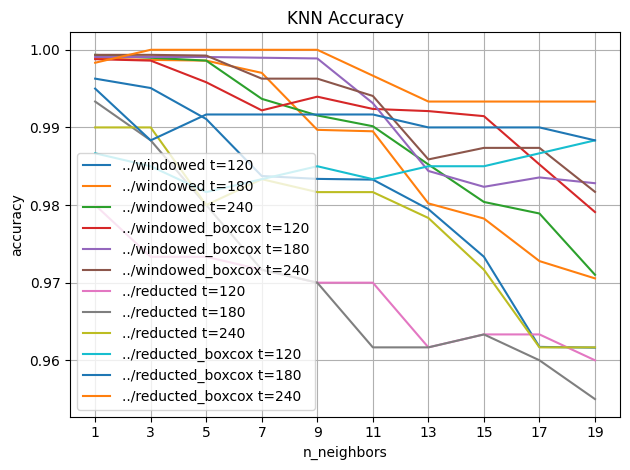

,directory,time_window,n_neighbors,score
111,../reducted_boxcox,240,3,1.0
114,../reducted_boxcox,240,9,1.0
113,../reducted_boxcox,240,7,1.0
112,../reducted_boxcox,240,5,1.0
20,../windowed,240,1,0.99935
51,../windowed_boxcox,240,3,0.99935
50,../windowed_boxcox,240,1,0.99935
52,../windowed_boxcox,240,5,0.999257
40,../windowed_boxcox,180,1,0.999071
41,../windowed_boxcox,180,3,0.999071


In [4]:
# 全データを使用して検証
N_SAMPLES = 60
RANDOM_STATES = [0, 1, 2, 3, 4, 5, 6, 7]

# スコア表の初期化
df_score = pd.DataFrame(columns=["directory", "time_window", "n_neighbors", "avg(score)", "std(score)", "avg(score)-std(score)"])


for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIMEWINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        
        accs = []
        for n_neighbors in N_NEIGHBORS_LIST:
            scores = []
            for random_state in RANDOM_STATES:
                df_train = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)
                X_train = df_train.drop(columns=["label", "ble_id"])
                y_train = df_train["label"]
                df_test = df.drop(df_train.index)
                X_test = df_test.drop(columns=["label", "ble_id"])
                y_test = df_test["label"]

                knn = skn.KNeighborsClassifier(n_neighbors=n_neighbors)
                knn.fit(X_train, y_train)

                scores.append(knn.score(X_test, y_test))

            accs.append(np.mean(scores))
            df_score.loc[len(df_score)] = pd.Series(
                {
                    "directory": directory,
                    "time_window": time_window,
                    "n_neighbors": n_neighbors,
                    "avg(score)": np.mean(scores),
                    "std(score)": np.std(scores),
                    "avg(score)-std(score)": np.mean(scores) - np.std(scores),
                },
            )

        plt.plot(N_NEIGHBORS_LIST, accs)

        

plt.title("KNN Accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(N_NEIGHBORS_LIST)
plt.grid(True)
plt.legend([f"{dir} t={time_window}" for dir in DIRECTORIES for time_window in TIMEWINDOWS])

plt.tight_layout()
plt.show()
display(df_score.sort_values("score", ascending=False).head(20))